1. formulating the question: Is the species 

Is the species an iris-setosa?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

#De data binnenhalen
train= pd.read_csv('iris_with_outliers.csv')

2. Finding and understanding the data

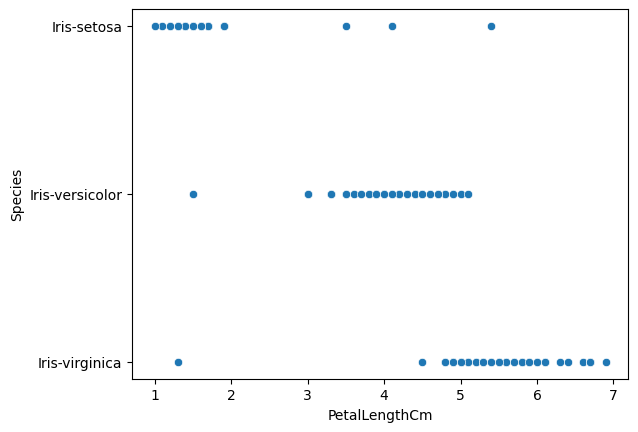

In [3]:
sns.scatterplot(data=train, x="PetalLengthCm", y="Species")
plt.show()

# Hier zie je dat er meerdere outliers zijn, dat zijn de stipjes die niet bij de andere liggen.

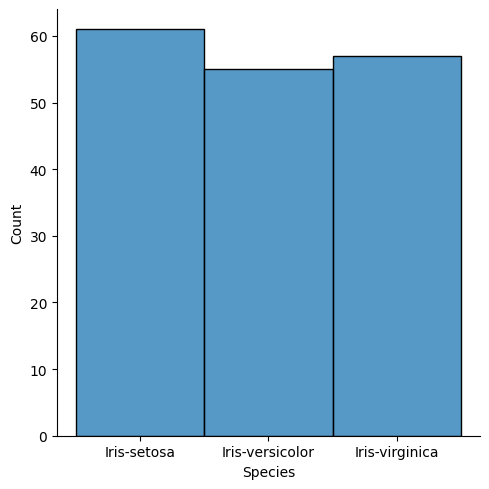

In [4]:
sns.displot(x=train['Species'])

plt.show()

3. Cleaning the Data and Feature Engineering

In [5]:
clean_train = train.drop(['Unnamed: 0', 'Id'],axis=1)

extra_clean_train = clean_train.dropna()
print(extra_clean_train.isna().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


4. Choosing a Model

Achteraf had een ander model beter geschikt geweest voor deze vraag aangezien dit model is om te achterhalen welke species het is en niet of het een bepaalde species is. Dit hebben we opgelost door op het einde een if statement te gebruiken of het de juiste species is.

In [6]:
X = extra_clean_train.drop('Species', axis=1) # Features
y = extra_clean_train['Species'] # Target variable

# Stap 4: Label Encoding voor de target variabele
extra_clean_train = LabelEncoder()
y = extra_clean_train.fit_transform(y)
 
# Verdeel de data in trainings- en testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Model initialiseren en trainen
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
 
# Voorspel de testset
y_pred = model.predict(X_test)
 
# Evalueer de nauwkeurigheid van het model
accuracy = accuracy_score(y_test, y_pred)
print("Nauwkeurigheid van het model:", accuracy)

Nauwkeurigheid van het model: 0.9696969696969697


5. Tuning and Evaluating


In [7]:
# Define the hyperparameters grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search Cross Validation with the classifier and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", best_params)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy of the best model: 0.9696969696969697


6. Using the Model and Presenting Results


In [8]:
new_observation = [[5.1, 3.5, 1.4, 0.2]]  # Voorbeeld van nieuwe observatie
predicted_species = extra_clean_train.inverse_transform(best_model.predict(new_observation))
print("Voorspelde soort voor de nieuwe observatie:", predicted_species)

# If statement om de BINAIRE vraag te beantwoorden.
if predicted_species[0] == 'Iris-setosa':
    print("De voorspelde soort is Iris-setosa.")
else:
    print("De voorspelde soort is niet Iris-setosa.")

Voorspelde soort voor de nieuwe observatie: ['Iris-setosa']
De voorspelde soort is Iris-setosa.


c:\Users\joeyw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
